In [145]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [146]:
data = pd.read_csv('/Users/user/OneDrive/Documents/cleaned_dataset.csv')

In [147]:
data.head()

State  Account length  Area code International plan Voice mail plan  \
0    LA             117        408                 No              No   
1    IN              65        415                 No              No   
2    NY             161        415                 No              No   
3    SC             111        415                 No              No   
4    HI              49        510                 No              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                      0              184.5               97   
1                      0              129.1              137   
2                      0              332.9               67   
3                      0              110.4              103   
4                      0              119.3              117   

   Total day charge  Total sales  Total eve calls  Total eve charge  \
0             31.37        351.6               80             29.89   
1             21.95        228.5               83             19.42   
2             56.59        317.8               97             27.01   
3             18.77        137.3              102             11.67   
4             20.28        215.1              109             18.28   

   Total night minutes  Total night calls  Total night charge  \
0                215.8                 90                9.71   
1                208.8                111                9.40   
2                160.6                128                7.23   
3                189.6                105                8.53   
4                178.7                 90                8.04   

   Total intl minutes  Total intl calls  Total intl charge  \
0                 8.7                 4               2.35   
1                12.7                 6               3.43   
2                 5.4                 9               1.46   
3                 7.7                 6               2.08   
4                11.1                 1               3.00   

   Customer service calls  Churn  
0                       1  False  
1                       4   True  
2                       4   True  
3                       2  False  
4                       1  False

In [148]:
# Assuming 'churn' is the target variable
X = data.drop('Churn', axis=1)
y = data['Churn']
y

0      False
1       True
2       True
3      False
4      False
       ...  
662    False
663    False
664    False
665    False
666    False
Name: Churn, Length: 667, dtype: bool

In [149]:
# Pipeline for preprocessing numerical and categorical features
numerical_transformer = StandardScaler()
numerical_features = StandardScaler()
categorical_transformer = OneHotEncoder()
categorical_features = OneHotEncoder()



preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [150]:
# Define categorical and numerical features based on existing columns in the DataFrame
categorical_features = [col for col in X.columns if X[col].dtype == 'object']
numerical_features = [col for col in X.columns if X[col].dtype in ['int64', 'float64']]

In [151]:
# Check if all specified features are present in the DataFrame
all_features = categorical_features + numerical_features
missing_features = [feature for feature in all_features if feature not in X.columns]

if missing_features:
    raise ValueError(f"Columns {', '.join(missing_features)} are not present in the DataFrame.")

In [152]:
# Pipeline for preprocessing numerical and categorical features
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [153]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [154]:
# Define the pipeline with preprocessing and model
from sklearn.pipeline import Pipeline

pipeline_lr = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

pipeline_rf = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])


In [172]:
# Step 2: Model Training
model = pipeline_lr.fit(X_train, y_train)
pipeline_rf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Account length',
                                                   'Area code',
                                                   'Number vmail messages',
                                                   'Total day minutes',
                                                   'Total day calls',
                                                   'Total day charge',
                                                   'Total sales',
                                                   'Total eve calls',
                                                   'Total eve charge',
                                                   'Total night minutes',
                                                   'Total night calls',
                                                   'Total night charge',
                                                   'Total intl minutes',
                                                   'Total intl calls',
                                                   'Total intl charge',
                                                   'Customer service calls']),
                                                 ('cat', OneHotEncoder(),
                                                  ['State',
                                                   'International plan',
                                                   'Voice mail plan'])])),
                ('classifier', RandomForestClassifier())])

In [156]:
# Step 3: Model Evaluation
lr_pred = pipeline_lr.predict(X_test)
rf_pred = pipeline_rf.predict(X_test)

In [157]:
lr_accuracy = accuracy_score(y_test, lr_pred)
rf_accuracy = accuracy_score(y_test, rf_pred)

In [158]:
lr_precision = precision_score(y_test, lr_pred, average='micro')  # Changed to micro average
rf_precision = precision_score(y_test, rf_pred, average='micro')  # Changed to micro average


In [159]:
lr_recall = recall_score(y_test, lr_pred, average='micro')  # Changed to micro average
rf_recall = recall_score(y_test, rf_pred, average='micro')  # Changed to micro average


In [160]:
lr_f1 = f1_score(y_test, lr_pred, average='micro')  # Changed to micro average
rf_f1 = f1_score(y_test, rf_pred, average='micro')  # Changed to micro average

In [164]:
# Step 4: Results and Discussion
print("Logistic Regression Test Metrics:")
print(f"Accuracy: {lr_accuracy:.4f}, Precision: {lr_precision:.4f}, Recall: {lr_recall:.4f}, F1 Score: {lr_f1:.4f}")

print("\nRandom Forest Classifier Test Metrics:")
print(f"Accuracy: {rf_accuracy:.4f}, Precision: {rf_precision:.4f}, Recall: {rf_recall:.4f}, F1 Score: {rf_f1:.4f}")

Logistic Regression Test Metrics:
Accuracy: 0.9104, Precision: 0.9104, Recall: 0.9104, F1 Score: 0.9104

Random Forest Classifier Test Metrics:
Accuracy: 0.9403, Precision: 0.9403, Recall: 0.9403, F1 Score: 0.9403


In [174]:
from sklearn.pipeline import Pipeline
from sklearn.datasets import load_iris
import joblib
# Save the pipeline using joblib
pipeline_path = 'pipeline_lr.joblib'
joblib.dump(model, pipeline_path)

print(f"Pipeline saved to {pipeline_path}")



Pipeline saved to pipeline_lr.joblib


In [163]:
# Save the trained models
joblib.dump(pipeline_lr, 'pipeline_lr.joblib')
joblib.dump(pipeline_rf, 'pipeline_rf.joblib')

['pipeline_rf.joblib']

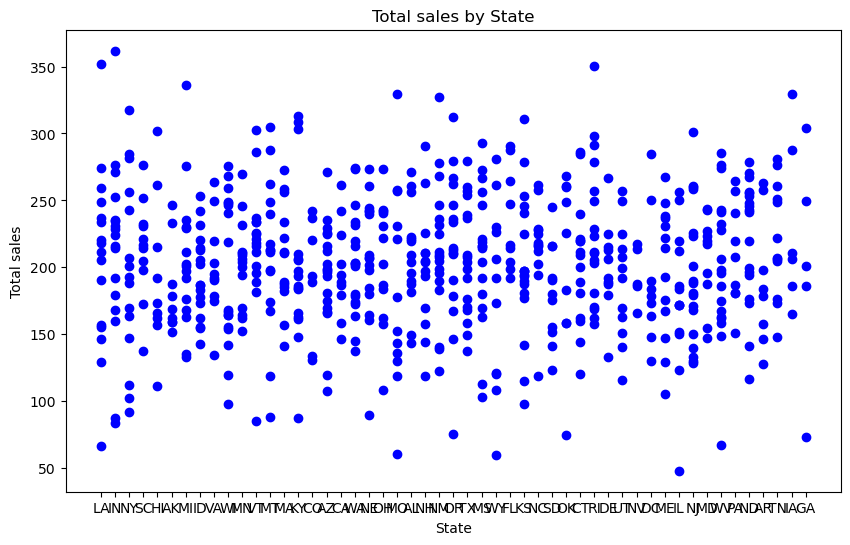

In [136]:
import matplotlib.pyplot as plt
# Plot
plt.figure(figsize=(10, 6))
plt.scatter(data['State'], data['Total sales'], color='blue')

# Add titles and labels
plt.title('Total sales by State')
plt.xlabel('State')
plt.ylabel('Total sales')

# Show the plot
plt.show()

In [137]:
import plotly.express as px
# Generate the bar chart
fig = px.bar(data, x='State', color='Churn', 
             title='Churn Distribution by State',
             labels={'State': 'State', 'Churn': 'Churn'},
             category_orders={'Churn': [False, True]}) # Ensure correct order of categories

fig.show()

In [144]:
# Generate the bar chart
fig = px.bar(data, x='State', color='Total sales', 
             title='Total sales Distribution by State',
             labels={'State': 'State', 'Total sales': 'Total sales'},
             category_orders={'Total sales': [False, True]}) # Ensure correct order of categories

fig.show()

In [139]:
# Group by State and calculate total and average sales
state_sales = data.groupby('State').agg(
    total_sales=pd.NamedAgg(column='Total sales', aggfunc='sum'),
    average_sales=pd.NamedAgg(column='Total sales', aggfunc='mean')
).reset_index()

# State with highest total sales
state_high_total_sales = state_sales[state_sales['total_sales'] == state_sales['total_sales'].max()]

# State with highest average sales
state_high_avg_sales = state_sales[state_sales['average_sales'] == state_sales['average_sales'].max()]

# State with lowest total sales
state_low_total_sales = state_sales[state_sales['total_sales'] == state_sales['total_sales'].min()]

# Display results
print("State with highest total sales:")
print(state_high_total_sales)

print("\nState with highest average sales:")
print(state_high_avg_sales)

print("\nState with lowest total sales:")
print(state_low_total_sales)

State with highest total sales:
   State  total_sales  average_sales
28    ND       3978.2     221.011111

State with highest average sales:
  State  total_sales  average_sales
9    FL       2115.7     235.077778

State with lowest total sales:
   State  total_sales  average_sales
33    NV        970.5          194.1


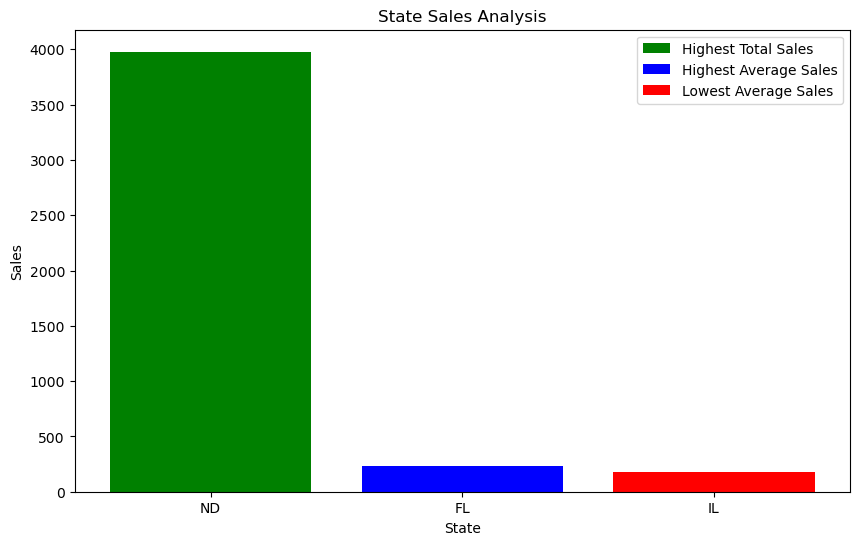

In [140]:

# Group by State and calculate total and average sales
state_sales = data.groupby('State').agg(
    total_sales=pd.NamedAgg(column='Total sales', aggfunc='sum'),
    average_sales=pd.NamedAgg(column='Total sales', aggfunc='mean')
).reset_index()

# State with highest total sales
state_high_total_sales = state_sales[state_sales['total_sales'] == state_sales['total_sales'].max()]

# State with highest average sales
state_high_avg_sales = state_sales[state_sales['average_sales'] == state_sales['average_sales'].max()]

# State with lowest average sales
state_low_avg_sales = state_sales[state_sales['average_sales'] == state_sales['average_sales'].min()]

# Plotting the results
fig, ax = plt.subplots(figsize=(10, 6))

# Plot highest total sales
ax.bar(state_high_total_sales['State'], state_high_total_sales['total_sales'], color='green', label='Highest Total Sales')

# Plot highest average sales
ax.bar(state_high_avg_sales['State'], state_high_avg_sales['average_sales'], color='blue', label='Highest Average Sales')

# Plot lowest average sales
ax.bar(state_low_avg_sales['State'], state_low_avg_sales['average_sales'], color='red', label='Lowest Average Sales')

# Adding titles and labels
ax.set_title('State Sales Analysis')
ax.set_xlabel('State')
ax.set_ylabel('Sales')
ax.legend()

# Show plot
plt.show()

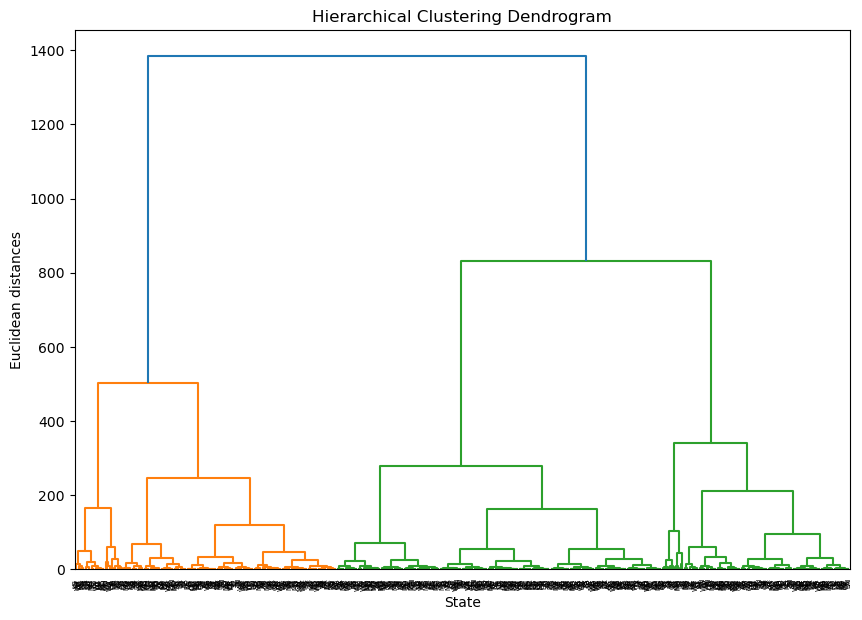

Hierarchical Clustering Results:
    State  Account length  Area code International plan Voice mail plan  \
0      LA             117        408                 No              No   
1      IN              65        415                 No              No   
2      NY             161        415                 No              No   
3      SC             111        415                 No              No   
4      HI              49        510                 No              No   
..    ...             ...        ...                ...             ...   
662    WI             114        415                 No             Yes   
663    AL             106        408                 No             Yes   
664    VT              60        415                 No              No   
665    WV             159        415                 No              No   
666    CT             184        510                Yes              No   

     Number vmail messages  Total day minutes  Total day calls  \


In [143]:
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt



# Extract relevant features for clustering
X = data[['Total sales']].values

# Generate the linkage matrix
Z = linkage(X, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z, labels=data['State'].values)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('State')
plt.ylabel('Euclidean distances')
plt.show()

# Apply hierarchical clustering and form flat clusters
# Let's assume we want to form 2 clusters
data['Hierarchical_Cluster'] = fcluster(Z, t=2, criterion='maxclust')

print("Hierarchical Clustering Results:")
print(data)
